<a href="https://colab.research.google.com/github/mash3133/PharmaHack2024/blob/main/Rich's_mice_dataset_of_2017_08_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading NWB files from Dandiset 000579: Two-photon calcium imaging of mouse posterior cortical areas during dynamic navigation decisions

---
This is the example notebook for reading the NWB files from the [Dandiset 000579: "Two-photon calcium imaging of mouse posterior cortical areas during dynamic navigation decisions.](https://dandiarchive.org/dandiset/000579/draft)"

*Created by [Shih-Yi Tseng](https://github.com/sytseng) from the [Harvey Lab](https://harveylab.hms.harvard.edu/) at Harvard Medical School*

*Last updated: 7/21/2023*


#### Related publication
Tseng, S.Y., Chettih, S.N., Arlt, C., Barroso-Luque, R. and Harvey, C.D., 2022. Shared and specialized coding across posterior cortical areas for dynamic navigation decisions. Neuron, 110(15), pp.2484-2502. [DOI:10.1016/j.neuron.2022.05.012](https://www.sciencedirect.com/science/article/pii/S0896627322004536?via%3Dihub).

#### Dandiset description

The dataset contains calcium activity of >200,000 neurons recorded from 6 different cortical areas in mouse posterior cortex L2/3 and L5 using two-photon imaging, including V1 and secondary visual areas (AM and PM), retrosplenial cortex (RSC) and posterior parietal cortex (visA and MM), while the mice were performing a flexible decision-making task based on rule-switching during virtual navigation. There are total 300 behavior + imaging sessions collected from 8 mice. The neurons in each experiment have been registered into the Allen Institute Mouse Common Coordinate Framework (CCF) based on widefield retinotopy. In addition, these neurons contain fluorescent labels of retroAAV injected in one of the two sets of projection targets: an anterior part of anterior cingulate cortex/secondary motor cortex (ACC/M2) and striatum, or a posterior part of ACC/M2 and orbitofrontal cortex (OFC).

#### Task description
The mouse ran down a virtual Y-maze and used visual cues on the wall to guide its choice into one of the two maze arms. After the reaching the end of the arm, the mouse was presented with a feedback delay, followed by a visual feedback indicating the correctness of its choice, and then received reward for correct trials or entered inter-trial intervals for incorrect trials (shown in **B**). The rewarded associations between cue and choice are determined by two rules (rule A or rule B as indicated in **A**), and the rule swicthed in blocks of 100-175 trials without explicit signaling multiple times within a single session. The mouse's performance usually dropped below chance level (fraction correct < 0.5) and recovered to expert level after 30-50 trials after rule switches (shown in **C**).

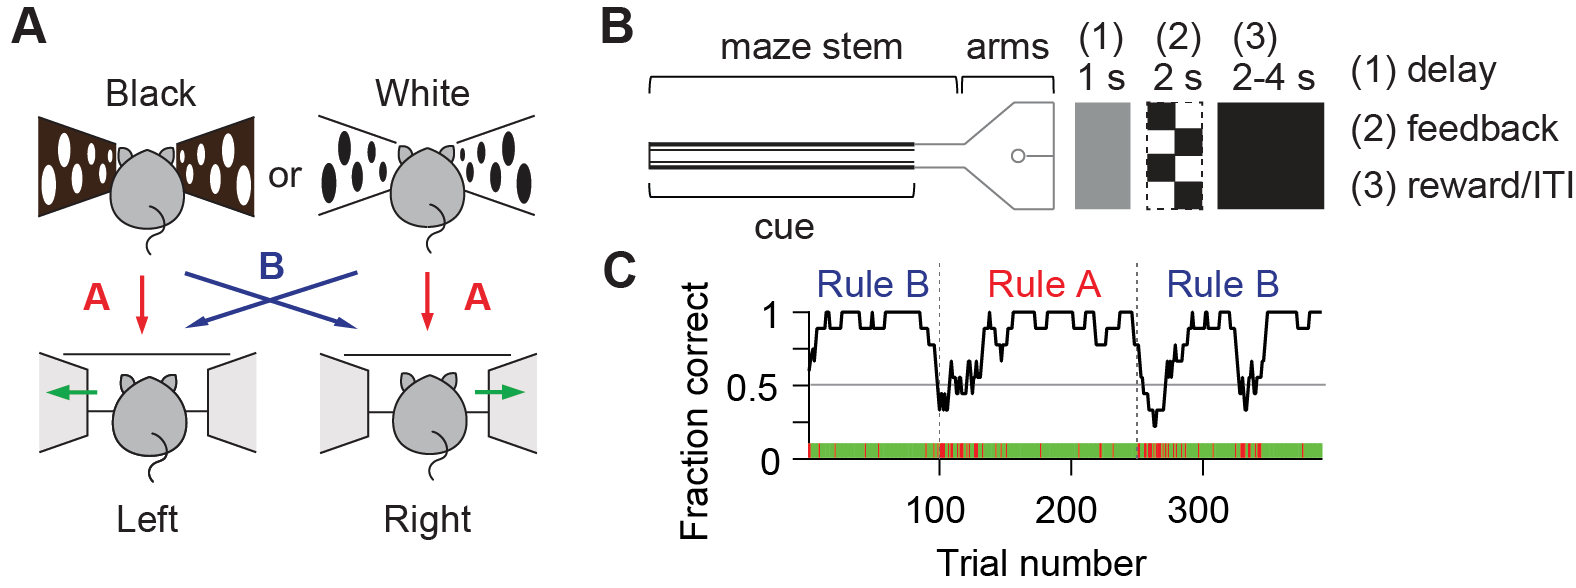

The two following sections describe how to read, extract and visualize information in the two types of NWB files in the Dandiset: *single session NWB files with behavior + ophys* in **Section A** and mouse-specific *NWB files with widefield retinotopy and two-photon overview images* in **Section B**.

# Section A: Read single session NWB file (behavior+ophys)

This section describes how to read and extract information contained in the single session NWB files with behavior + ophys, as well as some basic visualization of the data.

## Install PyNWB and dandi

First of all, install [PyNWB](https://pynwb.readthedocs.io/en/stable/index.html), the Python package for the Neurodata Without Borders (NWB) data format in your local environment.

`pip install -U pynwb` or `conda install -c conda-forge pynwb`

You can also install the DANDI CLI into your Python environment, which allows you to interact with the DANDI Archive database with their CLI tools. See the [DANDI handbook](https://www.dandiarchive.org/handbook/) for more instructions.

`pip install -U dandi`

Alternatively, you can use the web-based data portal to download files from Dandisets.

## Install NWB extension for custom lab meta data

Next, install the NWB extnesion for custom lab meta data from here: https://github.com/sytseng/ndx-harvey-swac and install it in your environment, or call

`pip install git+https://github.com/sytseng/ndx-harvey-swac.git`

In [ ]:
!pip install -U dandi
!pip install -U pynwb
!pip install git+https://github.com/sytseng/ndx-harvey-swac.git

  Cloning https://github.com/sytseng/ndx-harvey-swac.git to /tmp/pip-req-build-sjv2vqn5
  Running command git clone --filter=blob:none --quiet https://github.com/sytseng/ndx-harvey-swac.git /tmp/pip-req-build-sjv2vqn5
  Resolved https://github.com/sytseng/ndx-harvey-swac.git to commit c82b84cbf7c9d3e8c320c439dab3bf2fd48f0ae8
  Preparing metadata (setup.py) ... done


Then load libaries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from pynwb import NWBHDF5IO
from ndx_harvey_swac import LabMetaDataSession

## Download an example NWB file

Download the NWB file from DANDI dataset (https://dandiarchive.org/dandiset/000579/draft). For example, download the session file for mouse 9 session date 2017/08/19 (Go to FILES on the right panel -> click on the folder for sub-9 -> find the file named *sub-9_ses-mouse-9-session-date-2017-08-19-area-visA-L23-multi-plane-imaging_behavior+ophys.nwb*). You can download it directly from the DANDI website, or use DANDI CLI in the command line window:

`dandi download https://api.dandiarchive.org/api/assets/0dbf026f-1c13-45ed-874f-83c07a742d32/download/`

In [ ]:
!dandi download https://api.dandiarchive.org/api/assets/0dbf026f-1c13-45ed-874f-83c07a742d32/download/
!dandi download https://api.dandiarchive.org/api/assets/240d4fa5-278a-422f-aaa0-5afff381bb57/download/
!dandi download https://api.dandiarchive.org/api/assets/4ddd7455-ab78-402c-92c8-a55ce6eb689b/download/
!dandi download https://api.dandiarchive.org/api/assets/3362af75-91fc-4e40-8536-aabcb74f8f15/download/

PATH                                                                                          SIZE      DONE    DONE% CHECKSUM STATUS  MESSAGE          
sub-9_ses-mouse-9-session-date-2017-08-17-area-RSC-L23-multi-plane-imaging_behavior+ophys.nwb                                  error   FileExistsError  
Summary:                                                                                      0 Bytes   0 Bytes                1 error 1 FileExistsError
                                                                                              +611.9 MB 0.00%                                           
2024-03-17 16:44:16,235 [    INFO] Logs saved in /root/.local/state/dandi-cli/log/20240317164415Z-53613.log
PATH                                                                                          SIZE      DONE    DONE% CHECKSUM STATUS  MESSAGE          
sub-9_ses-mouse-9-session-date-2017-08-07-area-RSC-L23-multi-plane-imaging_behavior+ophys.nwb                                  

In [ ]:
# specify the file path in your local file system (PLEASE CHANGE THIS!)
filepaths = [
    "sub-9_ses-mouse-9-session-date-2017-08-17-area-RSC-L23-multi-plane-imaging_behavior+ophys.nwb",
    "sub-9_ses-mouse-9-session-date-2017-08-07-area-RSC-L23-multi-plane-imaging_behavior+ophys.nwb",
    "sub-9_ses-mouse-9-session-date-2017-08-09-area-MM-L23-multi-plane-imaging_behavior+ophys.nwb",
    "sub-9_ses-mouse-9-session-date-2017-08-11-area-visA-L23-multi-plane-imaging_behavior+ophys.nwb",
]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

## Read the NWB file
Call the `NWBHDF5IO.read()` method to read the NWB data into an `NWBFile` object. Print the `NWBFile` object to inspect its contents.

In [ ]:
# Initialize an empty list to store dataframes
dfs = []

# Loop over each file
for filepath in filepaths:
    # Read the NWB file
    with NWBHDF5IO(filepath, 'r') as io:
        nwb = io.read()
        # Convert trials data to a dataframe and append to the list
        trial_df = nwb.trials.to_dataframe()
        dfs.append(trial_df)

In [ ]:
# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Export the combined dataframe to a CSV file
combined_df.to_csv('trial_data.csv', index=False)

# Section B: Read NWB file for widefield retinotopy and 2P window overview

In this section, we desribe how to read and extract information from the other type of NWB file. In the folder for every mouse, you can find a file named *sub-#_ses-Mouse-#-widefield-retinotopy-and-window-vessel_ophys.nwb*. This it the file for widefield retinotopy and two-photon overview vessel/AAVretro labeling images of each mouse. These mouse-level data was used for registration of the whole cranial window as well as the FOVs for individual behavior+imaging sessions into the Allen Institute Mouse Common Coordinate Framework (CCF).

For example, let's download the file for mouse #9.

`dandi download https://api.dandiarchive.org/api/assets/cd183c6f-be6e-4773-9320-23a4baed37e6/download/`

In [ ]:
!dandi download https://api.dandiarchive.org/api/assets/cd183c6f-be6e-4773-9320-23a4baed37e6/download/

In [ ]:
# specify the file path in your local file system (PLEASE CHANGE THIS!)
retinoFilepath = 'sub-9_ses-Mouse-9-widefield-retinotopy-and-window-vessel_ophys.nwb'

In [ ]:
# load the file and display the content
io = NWBHDF5IO(retinoFilepath, 'r')
nwb_retino = io.read()
nwb_retino

The `subject`, `surgery` and `virus` notes are identical to those in the single behavior+imaging session NWB file for this mouse.

In [ ]:
nwb_retino.subject

In [ ]:
nwb_retino.surgery

In [ ]:
nwb_retino.virus

## Processing modules

There are two processing modules in this file: `ophys` that contains static images of the vessel pattern, mTagBFP2 and mScarlet for the whole craniel window in this animal taken with thw two-photon microscope, and `retinotopy` that contains the widefield imaging results for retinotopy.

In [ ]:
# view content of processing modules
nwb_retino.processing

### Whole window vessel image

Aside from individual behavior+imaging sessions, we also took an overview image of the vessel pattern under the two-photon microscope with stiching FOVs, which can then be used for registraion of individual FOVs into window coordinate, as well as aligning to the widefield retinotopy results for registraion into Allen CCF.

There are two images for the whole window vessel pattern:
- **raw_whole_window_vessel_img_2p**: raw image of vessel pattern at brain surface for the whole window (the raw orientation under the 2P microscope, x axis is ~posterior to anterior, y axis is ~lateral (left) to medial (right))
- **processed_whole_window_vessel_img_2p**: processed image of raw stitched vessel pattern (removed the overlaping regions, resized to same number of pixels per mm for both axes, and rotated 90 degree + flipped L-R so x axis became ~lateral to medial, y axis became ~posterior to anterior, same orientation as WF vessel)

In [ ]:
# view content of whole_window_vessel_img_2p
nwb_retino.processing['ophys']['whole_window_vessel_img_2p']

In [ ]:
# extract vessel pattern images
vessel_raw = nwb_retino.processing['ophys']['whole_window_vessel_img_2p']['raw_whole_window_vessel_img_2p'].data[:]
vessel_processed = nwb_retino.processing['ophys']['whole_window_vessel_img_2p']['processed_whole_window_vessel_img_2p'].data[:]

In [ ]:
# visualize vessel images
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(vessel_raw, vmax = np.percentile(vessel_raw[:], 99.5), cmap='gray')
ax[0].set(title = 'Raw vessel image')
ax[1].imshow(vessel_processed, vmax = np.percentile(vessel_processed[:], 99.5), cmap='gray')
ax[1].set(title = 'Processed vessel image');

### Whole window AAVretro label images

We also took the overview images of the AAVretro labeling for mTagBFP2 and mScarlet for each cortical layer (L2, L3, L5) under the two-photon microscope with stiching FOVs. Same as the vessel image, there are both the raw images and processed images.

**Note that the mTagBFP2 labeling images in L5 were mostly beedthrough signals from the GCaMP; we barely saw any real blue fluorecent signals in L5. Therefore, L5 neurons were always considered not labeled and we are not showing those images below.**

In [ ]:
# view content of whole_window_mTagBFP2_img_2p
nwb_retino.processing['ophys']['whole_window_mTagBFP2_img_2p']

In [ ]:
# extract images for mTagBFP2 labeling
mTagBFP2_L2_raw = nwb_retino.processing['ophys']['whole_window_mTagBFP2_img_2p']['raw_whole_window_mTagBFP2_img_L2'].data[:]
print(mTagBFP2_L2_raw)
mTagBFP2_L3_raw = nwb_retino.processing['ophys']['whole_window_mTagBFP2_img_2p']['raw_whole_window_mTagBFP2_img_L3'].data[:]
mTagBFP2_L2_processed = nwb_retino.processing['ophys']['whole_window_mTagBFP2_img_2p']['processed_whole_window_mTagBFP2_img_L2'].data[:]
print(mTagBFP2_L2_processed)
mTagBFP2_L3_processed = nwb_retino.processing['ophys']['whole_window_mTagBFP2_img_2p']['processed_whole_window_mTagBFP2_img_L3'].data[:]


In [ ]:
# visualize mTagBFP2 labeling images
fig, ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0].imshow(mTagBFP2_L2_raw, vmax = np.percentile(mTagBFP2_L2_raw[:], 99.5), cmap='gray')
ax[0,0].set(title = 'mTagBFP2 L2 raw')
ax[0,1].imshow(mTagBFP2_L3_raw, vmax = np.percentile(mTagBFP2_L3_raw[:], 99.5), cmap='gray')
ax[0,1].set(title = 'mTagBFP2 L3 raw')
ax[1,0].imshow(mTagBFP2_L2_processed, vmax = np.percentile(mTagBFP2_L2_processed[:], 99.5), cmap='gray')
ax[1,0].set(title = 'mTagBFP2 L2 processed')
ax[1,1].imshow(mTagBFP2_L3_processed, vmax = np.percentile(mTagBFP2_L3_processed[:], 99.5), cmap='gray')
ax[1,1].set(title = 'mTagBFP2 L3 processed');

In [ ]:
# view content of whole_window_mScarlet_img_2p
nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']

In [ ]:
# extract images for mScarlet labeling
mScarlet_L2_raw = nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']['raw_whole_window_mScarlet_img_L2'].data[:]
mScarlet_L3_raw = nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']['raw_whole_window_mScarlet_img_L3'].data[:]
mScarlet_L5_raw = nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']['raw_whole_window_mScarlet_img_L5'].data[:]
mScarlet_L2_processed = nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']['processed_whole_window_mScarlet_img_L2'].data[:]
mScarlet_L3_processed = nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']['processed_whole_window_mScarlet_img_L3'].data[:]
mScarlet_L5_processed = nwb_retino.processing['ophys']['whole_window_mScarlet_img_2p']['processed_whole_window_mScarlet_img_L5'].data[:]

In [ ]:
# visualize mTagBFP2 labeling images
fig, ax = plt.subplots(2,3, figsize=(12,8))
ax[0,0].imshow(mScarlet_L2_raw, vmax = np.percentile(mScarlet_L2_raw[:], 99.5), cmap='gray')
ax[0,0].set(title = 'mScarlet L2 raw')
ax[0,1].imshow(mScarlet_L3_raw, vmax = np.percentile(mScarlet_L3_raw[:], 99.5), cmap='gray')
ax[0,1].set(title = 'mScarlet L3 raw')
ax[0,2].imshow(mScarlet_L5_raw, vmax = np.percentile(mScarlet_L5_raw[:], 99.5), cmap='gray')
ax[0,2].set(title = 'mScarlet L5 raw')
ax[1,0].imshow(mScarlet_L2_processed, vmax = np.percentile(mScarlet_L2_processed[:], 99.5), cmap='gray')
ax[1,0].set(title = 'mScarlet L2 processed')
ax[1,1].imshow(mScarlet_L3_processed, vmax = np.percentile(mScarlet_L3_processed[:], 99.5), cmap='gray')
ax[1,1].set(title = 'mScarlet L3 processed')
ax[1,2].imshow(mScarlet_L5_processed, vmax = np.percentile(mScarlet_L5_processed[:], 99.5), cmap='gray')
ax[1,2].set(title = 'mScarlet L5 processed');

###  Widefield retinotopy

The `retinotopy` processing module contains the results of the widefield images of this mouse, including:
- **axis_1_phase_map_altitude**: axis 1 (altitude) phase map in degree
- **axis_2_phase_map_azimuth**: axis 2 (azimuth) phase map in degree
- **field_sign_map**: the field sign map
- **power_map_avg**: average FFT power map (for the stimuli of 4 cordinal directions)
- **widefield_vessel_image**: structural image of vessel pattern at brain surface for the whole window; x axis is ~lateral (left) to medial (right), y axis is ~posterior to anterior, same as the "processed" vessel image and AAVretro label images under 2P microscope.

In [ ]:
# view content of widefield retinotopy
nwb_retino.processing['retinotopy']['widefield_imaging']

In [ ]:
# extract widefield imaging results
axis_1_phase_map_altitude = nwb_retino.processing['retinotopy']['widefield_imaging']['axis_1_phase_map_altitude'].data[:]
axis_2_phase_map_azimuth = nwb_retino.processing['retinotopy']['widefield_imaging']['axis_2_phase_map_azimuth'].data[:]
field_sign_map = nwb_retino.processing['retinotopy']['widefield_imaging']['field_sign_map'].data[:]
power_map_avg = nwb_retino.processing['retinotopy']['widefield_imaging']['power_map_avg'].data[:]
widefield_vessel_image = nwb_retino.processing['retinotopy']['widefield_imaging']['widefield_vessel_image'].data[:]

In [ ]:
# visualize vessel images
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(widefield_vessel_image, vmax = np.percentile(widefield_vessel_image[:], 99.5), cmap='gray')
ax[0].set(title = 'Widefield vessel image')
ax[1].imshow(vessel_processed, vmax = np.percentile(vessel_processed[:], 99.5), cmap='gray')
ax[1].set(title = 'Processed 2P vessel image');

### Mouse-specific lab meta data

You can find other information about this mouse in the mouse-specific `lab_meta_data`.

In **AAVretroInjSite**, you can find where the AAVretro for mScarlet and mTagBFP2 were injected to for this mice. This is the same as `lab_meta_data` for individual sessions.

In **Registration**, you can find information about registration of the cranial window to Allen CCF.
- **window_center_ml_ccf_mm**: cranial window center location along ML axis in CCF (mm from bregma)
- **window_center_AP_ccf_mm**: cranial window center location along AP axis in CCF (mm from bregma)
- **vessel_2p_center_ml_ccf_mm**: center location of the processed whole window vessel 2P image along ML axis in CCF (mm from bregma)
- **vessel_2p_center_ap_ccf_mm**: center location of the processed whole window vessel 2P image along AP axis in CCF (mm from bregma)
- **rs_to_ccf_mm_transformation_matrix**: transformation matrix for transforming the processed whole window vessel 2P image to CCF coordinate (mm from bregma)
- **wf_to_rs_transformation_matrix**: transformation matrix for transforming widefield images to the processed whole window vessel 2P image

In [ ]:
# view mouse-specific lab meta data
nwb_retino.lab_meta_data['harvey_lab_swac_metadata_mouse']

In [ ]:
# visualize widefield retinotopy results
fig, ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0].imshow(axis_1_phase_map_altitude, vmax = np.percentile(axis_1_phase_map_altitude[:], 99.5), cmap='gray')
ax[0,0].set(title = 'axis 1 phase map (altitude)')
ax[0,1].imshow(axis_2_phase_map_azimuth, vmax = np.percentile(axis_2_phase_map_azimuth[:], 99.5), cmap='gray')
ax[0,1].set(title = 'axis 2 phase map (azimuth)')
ax[1,0].imshow(field_sign_map, vmin = -np.percentile(np.abs(field_sign_map[:]), 99.5),vmax = np.percentile(np.abs(field_sign_map[:]), 99.5), cmap='bwr')
ax[1,0].set(title = 'field sign map')
ax[1,1].imshow(power_map_avg, vmax = np.percentile(power_map_avg[:], 99.5), cmap='gray')
ax[1,1].set(title = 'average power map');

# First model regarding calcium related tests

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
import warnings
# Disable all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#convert categorical labels into numerical labels
label_encoder = preprocessing.LabelEncoder()

#to get the current directory
current_directory = os.getcwd()

#loading the dataset
try:
    data = pd.read_csv(current_directory+'\\trial_data.csv')
except FileNotFoundError:
    data = pd.read_csv(current_directory+'/trial_data.csv')

valid_data = data.dropna()
valid_data = valid_data.sample(frac=1, random_state=42)
# Filter rows where is_vis is True
true_data = valid_data[valid_data['is_vis'] == True].head(300)

# Filter rows where is_vis is False
false_data = valid_data[valid_data['is_vis'] == False].head(300)

# Concatenate the true and false data together
trial = pd.concat([true_data, false_data])

#Encoding Categorical Variables
trial["is_vis"] = label_encoder.fit_transform(trial["is_vis"])
trial["is_ruleA"] = label_encoder.fit_transform(trial["is_ruleA"])
trial["is_switch"] = label_encoder.fit_transform(trial["is_switch"])
trial["is_cueB"] = label_encoder.fit_transform(trial["is_cueB"])
trial["is_choL"] = label_encoder.fit_transform(trial["is_choL"])
trial["is_correct"] = label_encoder.fit_transform(trial["is_correct"])

#separating the target variable
trial_labels = trial["is_correct"]
#trial = trial.drop("is_correct", axis=1) #.drop to remove column

In [ ]:
# Play around and see what happens to the models when you change the test-training ratios
train_size = 0.8
test_size = 1 - train_size
assert train_size + test_size == 1

trial_features = ['is_choL', 'is_cueB', 'is_ruleA', 'is_vis', 'is_switch']
trial = trial[trial_features]

# train_test_split this is a method that scikit-learn provides in the library
trial_train, trial_test, labels_train, labels_test = train_test_split(trial,trial_labels , train_size=1, random_state=42)

In [ ]:
def metrics(true_y,prediction_y):
    print(f"Accuracy: {accuracy_score(y_true=true_y,y_pred= prediction_y)}")
    print(f"Precision (Weighted): {precision_score(y_true=true_y,y_pred= prediction_y, average='weighted')}")
    print(f"Recall (Weighted): {recall_score(y_true=true_y,y_pred= prediction_y, average='weighted')}")
    print(f"F1 Score (Weighted): {f1_score(y_true=true_y,y_pred= prediction_y,average='weighted')}")
    print(classification_report(y_true=true_y,y_pred= prediction_y, zero_division='warn'))
    confusion_matrix(y_true=true_y,y_pred= prediction_y)

def compareModels(true_y,prediction_y):
    return [accuracy_score(y_true=true_y,y_pred= prediction_y),
    precision_score(y_true=true_y,y_pred= prediction_y, average='weighted'),
    recall_score(y_true=true_y,y_pred= prediction_y, average='weighted'),
    f1_score(y_true=true_y,y_pred= prediction_y,average='weighted')]

In [ ]:
import os
os.makedirs('models', exist_ok=True)

In [ ]:
#Bayes
classifier = MultinomialNB()
if (os.path.exists('models/MNB1_model.pickle')):
    pickle_in = open('models/MNB1_model.pickle','rb')
    MNBclf = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(trial_train, labels_train)
    with open('models/MNB1_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1_model.pickle','rb')
    MNBclf = pickle.load(pickle_in)
pickle_in.close()

In [ ]:
labels_trial_predict = MNBclf.predict(trial_test)

metrics(labels_test, labels_trial_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_trial_predict))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='magma')

In [ ]:
classifier = DecisionTreeClassifier(criterion="entropy") # default measure of chaos is gini in scikit-learn
if (os.path.exists('models/DT1_model.pickle')):
    pickle_in = open('models/DT1_model.pickle','rb')
    DTclf = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(trial_train, labels_train)
    with open('models/DT1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/DT1_model.pickle','rb')
    DTclf = pickle.load(pickle_in)
pickle_in.close()

In [ ]:
labels_trial_predict = DTclf.predict(trial_test)

metrics(labels_test, labels_trial_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=labels_test, y_pred= labels_trial_predict))
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax,cmap='magma')

In [ ]:
# Discretize is_vis feature into two bins: <= 0.5 and > 0.5
trial['is_vis_bin'] = pd.cut(trial['is_vis'], bins=[-np.inf, 0.5, np.inf], labels=[0, 1], include_lowest=True, right=False)  # Use numerical labels

# Define features and target variable
trial_features = ['is_vis_bin', 'is_ruleA', 'is_switch', 'is_cueB', 'is_choL']
X = trial[trial_features]
y = trial_labels

# Train the decision tree model
classifier = DecisionTreeClassifier(criterion="entropy")
DTclf = classifier.fit(X, y)

# Define class names as strings
class_names = ['Incorrect', 'Correct']

classifier = DecisionTreeClassifier(criterion="entropy")
DTclf = classifier.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(25, 15))
plot_tree(DTclf, feature_names=trial_features, class_names=class_names, fontsize=10)
plt.show()

# Analyze feature importance
feature_importance = DTclf.feature_importances_
print("Feature Importance:", feature_importance)


# Second Trial regarding widefield retinotopy

In [ ]:
!pip install dandi
!dandi download https://api.dandiarchive.org/api/assets/3362af75-91fc-4e40-8536-aabcb74f8f15/download/

In [ ]:
import numpy as np
import pandas as pd
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from skimage.transform import resize
import os

# Chemin de mes 2 fichiers
train_file_path = './sub-9_ses-mouse-9-session-date-2017-08-11-area-visA-L23-multi-plane-imaging_behavior+ophys.nwb'
test_file_path = './sub-9_ses-mouse-9-session-date-2017-08-11-area-visA-L23-multi-plane-imaging_behavior+ophys.nwb'

# Code pour extraire les données d'un fichier NWB
io_train = NWBHDF5IO(train_file_path, 'r')
nwb_train = io_train.read()

io_test = NWBHDF5IO(test_file_path, 'r')
nwb_test = io_test.read()

# Extraction des données de neurones et des étiquettes de position de la souris
deconv_0 = nwb_train.processing['ophys']['deconvolved_activity_plane_0'].data[:]

# Extraction des données de neurones et des étiquettes de position de la souris
ml_train = nwb_train.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()['ml'].values
ap_train = nwb_train.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()['ap'].values
depth_train = nwb_train.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()['depth'].values
area_train = nwb_train.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()['area'].values
deconv_0 = nwb_train.processing['ophys']['deconvolved_activity_plane_0'].data[:]

ml_test = nwb_test.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()['ml'].values
ap_test = nwb_test.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()['ap'].values
depth_test = nwb_test.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()['depth'].values
area_test = nwb_test.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()['area'].values

# convert the first PlaneSegmentation into dataframe and examine the information
planeSeg_0_df = nwb_train.processing['ophys']['ImageSegmentation']['PlaneSegmentation_0'].to_dataframe()
planeSeg_0_df.head(20)
# extract information for these neurons in plane 0
ml_0 = planeSeg_0_df['ml'].values
ap_0 = planeSeg_0_df['ap'].values
depth_0 = planeSeg_0_df['depth'].values
area_0 = planeSeg_0_df['area'].values
mTagBFP2_0 = planeSeg_0_df['mTagBFP2'].values
mScarlet_0 = planeSeg_0_df['mScarlet'].values

# compute number of neurons in this plane
n_neurons_0 = ml_0.shape[0]

# convert trial table into dataframe and examine it
trial_df = nwb_train.trials.to_dataframe()
trial_df.head()
# extract basic trial information
cueB = trial_df['is_cueB'].values.astype(int)
choL = trial_df['is_choL'].values.astype(int)
vis = trial_df['is_vis'].values.astype(int)
ruleA = trial_df['is_ruleA'].values.astype(int)
correctness = trial_df['is_correct'].values.astype(int)
switches = np.argwhere(trial_df['is_switch'].values).flatten()
# get number of trials
nTrials = cueB.shape[0]

# compute moving average of correct for every 7 trials
corr_moving_avg = np.convolve(correctness, np.ones(7,)/7,mode='same')
# extract frame-aligned behavioral variables
imaging_frame_timestamps = nwb_train.processing['behavior']['frame_aligned_position']['frame_aligned_forward_and_lateral_position'].timestamps[:]
frame_aligned_position = nwb_train.processing['behavior']['frame_aligned_position']['frame_aligned_forward_and_lateral_position'].data[:]
frame_aligned_velocity = nwb_train.processing['behavior']['frame_aligned_velocity']['frame_aligned_pitch_roll_yaw_velocity'].data[:]
frame_aligned_trial_number = nwb_train.processing['behavior']['frame_aligned_trial_number'].data[:]
frame_aligned_time_from_choice_point = nwb_train.processing['behavior']['frame_aligned_time_from_choice_point'].data[:]
plane_idx_for_imaging_frames = nwb_train.processing['behavior']['plane_idx_for_imaging_frames'].data[:]
# identify valid trials (trials that have corresponding imaging frames)
validTrials = np.unique(frame_aligned_trial_number[~np.isnan(frame_aligned_trial_number)]).astype(int)
nValidTrials = validTrials.shape[0]
## extract important task parameters from lab meta data
# maze configuration
meter_per_virmen_unit = nwb_train.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__meter_per_virmen_unit # 1 Virmen unit in the maze ~= 0.01 m
stem_length = nwb_train.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__maze_stem_length*meter_per_virmen_unit
arm_length = nwb_train.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__maze_arm_length*meter_per_virmen_unit

# the length of the cue delay before the maze arms (sueful if you're analyzing visual response to the cue)
cue_delay_length = nwb_train.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__cue_delay_length*meter_per_virmen_unit

# the length of the feedback delay in seconds
feedback_delay = nwb_train.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__feedback_delay_sec

# the length of the reward delay in seconds (equals length of the feedback delay + feedback period)
reward_delay = nwb_train.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__reward_delay_sec

# the lenght of ITI for correct and incorrect trials
iti_correct = nwb_train.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__iti_correct_sec
iti_incorrect = nwb_train.lab_meta_data['harvey_lab_swac_metadata_session'].TaskParam__iti_incorrect_sec
# set up position bins
pos_half_width = 0.1
maze_length = (stem_length + arm_length)
pos_bins = np.arange(0.1, maze_length + 0.05, pos_half_width)
# position and temporal binning for deconvolved activity
activity_pos = np.full((nValidTrials, pos_bins.shape[0], n_neurons_0), np.NaN)

# set up time bins
tm_half_width = 1/3
feedback_iti_corr_length = reward_delay + iti_correct
tm_bins = np.arange(0, feedback_iti_corr_length + 0.1, tm_half_width)

# prelocate
vel_pos = np.full((nValidTrials, pos_bins.shape[0]), np.NaN)
vel_tm = np.full((nValidTrials, tm_bins.shape[0]), np.NaN)

activity_tm = np.full((nValidTrials, tm_bins.shape[0], n_neurons_0), np.NaN)

# use plane_idx_for_imaging_frames to identify behavioral variables corresponding to this imaging plane
nPlane = 0
frame_idx_0 = plane_idx_for_imaging_frames == nPlane
trial_number_0 = frame_aligned_trial_number[frame_idx_0]
# get forward and lateral positions
posF = frame_aligned_position[:,0]
posF_0 = posF[frame_idx_0]
time_from_choice_point_0 = frame_aligned_time_from_choice_point[frame_idx_0]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Préparation des données
fill_value = n_neurons_0  # Valeur de remplissage pour np.full()
deconv_0_expanded = np.expand_dims(deconv_0, axis=1)
activity_pos_selected = activity_pos[:, :nValidTrials, :]

# Création et entraînement du modèle pour chaque neurone
models = []
mses = []
for i in range(n_neurons_0):
    X = np.concatenate((deconv_0_expanded[:nValidTrials, :, i], np.full((nValidTrials, 1), fill_value), activity_pos_selected[:, :, i]), axis=1)
    y = posF_0[:nValidTrials]

    # Remplacement des valeurs NaN par zéro
    X = np.nan_to_num(X)
    y = np.nan_to_num(y)

    # Division des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Création et entraînement du modèle
    model = LinearRegression()
    model.fit(X_train, y_train)
    models.append(model)

    # Prédiction sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Évaluation du modèle
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

print(f"Mean Squared Errors: {mses}")

Mean Squared Errors: [0.5146089922408188, 0.5363854661106344, 0.5313592058399437, 0.5300448222891163, 0.46348066524304227, 0.5288218196757746, 0.5337691233852795, 0.5168171323551644, 0.35034480455456496, 0.5399565320952782, 0.5287456633554376, 0.5348607475659277, 0.5433759366931423, 0.5376532111967276, 0.5340260289595543, 0.5457266282729771, 0.4624498626073219, 0.5207354854926669, 0.5374400811351324, 0.4838431300214497, 0.5361617305425914, 0.541174304055277, 0.5388417023921026, 0.5356023522849102, 0.5361561011655354, 0.5370372187024219, 0.53620613699492, 0.5361119633002669, 0.5346007355738411, 0.5327746962039703, 0.5120306598481295, 0.57123957025688, 0.5344650519263426, 0.5340429545963593, 0.5270013228782278, 0.536273495746461, 0.5322408879580478, 0.5273903030404187, 0.5199261305597442, 0.5394697606372901, 0.5392353328083448, 0.5415811467509065, 0.5382007576324501, 0.5286190866843178, 0.5364509024823867, 0.5393486589512833, 0.5362861658150964, 0.5293945986147396, 0.5301498562324298, 0.